### Lab 2.1: Perceptron Algorithm - Solution

In this lab you will implement the perceptron algorithm presented in lecture using NumPy.

In [1]:
import numpy as np
from palmerpenguins import load_penguins
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt

Here we loading and format the Palmer penguins dataset for binary classification.

In [2]:
df = load_penguins()

# drop rows with missing values
df.dropna(inplace=True)

# tricky code to randomly shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

# select only two specices
df = df[(df['species']=='Adelie')|(df['species']=='Chinstrap')]

# get two features
X = df[['flipper_length_mm','bill_length_mm']].values

# convert speces labels to -1 and 1
y = df['species'].map({'Adelie':-1,'Chinstrap':1}).values

To make the learning algorithm work more smoothly, we we will subtract the mean of each feature.

Here `np.mean` calculates a mean, and `axis=0` tells NumPy to calculate the mean over the rows (calculate the mean of each column).

In [3]:
X -= np.mean(X,axis=0)

### Exercises

Your task is to complete this class for the perceptron.  Fill in the `train_step`, `predict`, and `score` functions.

In [4]:
class Perceptron:
    def __init__(self,lr=1e-3):
        # store the learning rate
        self.lr = lr

        # initialize the weights to small, normally-distributed values
        self.w = np.random.normal(size=(2,))*0.01

        # initialize the bias to zero
        self.b = 0

    def train_step(self,x,y):
        """ Apply the first update rule shown in lecture.
            w'j = wj + s(yi - zi)xi
            Arguments:
             x: data point of shape (2,)
             y: label 
        """
        # WRITE CODE HERE
        z = self.predict(x)
        # z = x.dot(self.w)+self.b
        self.w += self.lr*(y-z)*x
        self.b += self.lr*(y-z)
    
    def predict(self,X):
        """ Calculate model prediction for all data points.
            
            Arguments:
             X: data matrix of shape (N,2)   
            Returns:
             Predicted labels (-1 or 1) of shape (N,)
        """
        # WRITE CODE HERE
        # Hint: look at np.where
        return np.where(X.dot(self.w)+self.b>0,1,-1)
    
    def score(self,X,y):
        """ Calculate model accuracy
            Arguments:
             X: data matrix of shape (N,2)   
             y: labels of shape (N,)
            Returns:
             Accuracy score
        """
        return np.mean(self.predict(X)==y)


Run the following code to train the model and print out the accuracy at each step.

In [5]:
model = Perceptron()
for i in range(len(X)):
    model.train_step(X[i],y[i])
    print(f'step {i}: {model.score(X,y)}')

step 0: 0.7990654205607477
step 1: 0.794392523364486
step 2: 0.780373831775701
step 3: 0.794392523364486
step 4: 0.794392523364486
step 5: 0.8457943925233645
step 6: 0.8317757009345794
step 7: 0.794392523364486
step 8: 0.8037383177570093
step 9: 0.7990654205607477
step 10: 0.794392523364486
step 11: 0.794392523364486
step 12: 0.794392523364486
step 13: 0.7850467289719626
step 14: 0.8411214953271028
step 15: 0.8411214953271028
step 16: 0.8411214953271028
step 17: 0.8364485981308412
step 18: 0.8364485981308412
step 19: 0.8364485981308412
step 20: 0.8364485981308412
step 21: 0.8364485981308412
step 22: 0.8364485981308412
step 23: 0.8364485981308412
step 24: 0.8364485981308412
step 25: 0.8364485981308412
step 26: 0.8364485981308412
step 27: 0.8364485981308412
step 28: 0.8364485981308412
step 29: 0.8364485981308412
step 30: 0.8457943925233645
step 31: 0.8504672897196262
step 32: 0.8551401869158879
step 33: 0.8504672897196262
step 34: 0.8504672897196262
step 35: 0.8504672897196262
step 36: 0

Finally we plot the decision regions.  (The blue part isn't shown because it doesn't like the -1 label.)

<Axes: >

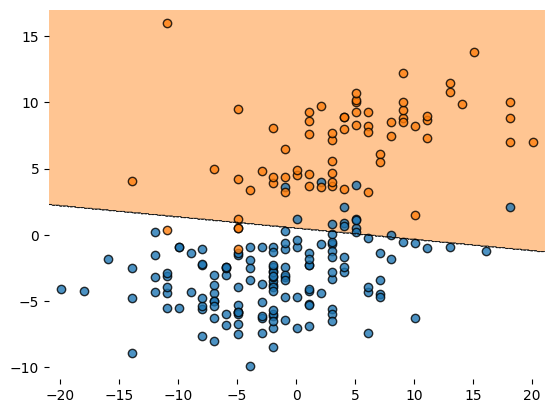

In [6]:
plot_decision_regions(X, y, clf=model, legend=0, markers='o')